In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np

In [3]:
file_path = "/content/preprocessed_reviews.csv"  # Ensure this file is in your directory
data = pd.read_csv(file_path)

In [4]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
custom_stop_words = set(stopwords.words('english')).union(["movie", "film"])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
data['final_review'] = data['final_review'].fillna('')
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X = vectorizer.fit_transform(data['final_review'])

In [7]:
words = vectorizer.get_feature_names_out()

In [8]:
lda = LatentDirichletAllocation(n_components=7, random_state=42)
lda.fit(X)

LatentDirichletAllocation(n_components=7, random_state=42)

In [10]:
for topic_idx, topic in enumerate(lda.components_):
     print(f"\nTopic {topic_idx + 1}:")
     print(" ".join([words[i] for i in topic.argsort()[-10:]]))




Topic 1:
seen story time bad scene really character like film movie

Topic 2:
time comedy way little story make film best like movie

Topic 3:
think scene character good time really make like film movie

Topic 4:
house dont pretty character bad time scene film like movie

Topic 5:
little really plot great good time story like movie film

Topic 6:
young life good new people story movie world character film

Topic 7:
scene make story life time game character movie like film


In [11]:
topic_distribution = lda.transform(X)
dominant_topics = topic_distribution.argmax(axis=1)
data['dominant_topic'] = dominant_topics

# Visualize topic distribution
print("\nTopic Distribution:")
print(data['dominant_topic'].value_counts())


Topic Distribution:
dominant_topic
2    268
0    161
4    115
3     60
6     54
5     51
1     44
Name: count, dtype: int64



Sentiment Distribution by Topic:
sentiment       negative  positive
dominant_topic                    
0               0.581250  0.418750
1               0.500000  0.500000
2               0.466418  0.533582
3               0.800000  0.200000
4               0.434783  0.565217
5               0.411765  0.588235
6               0.462963  0.537037


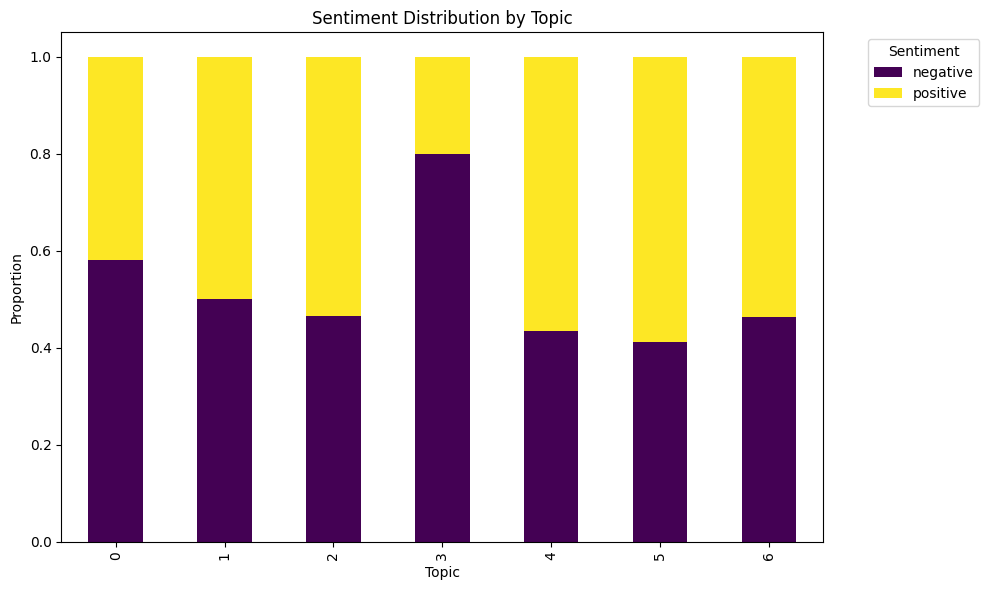

In [12]:
sentiment_topic = data.groupby('dominant_topic')['sentiment'].value_counts(normalize=True).unstack()
print("\nSentiment Distribution by Topic:")
print(sentiment_topic)

# Visualize sentiment-topic correlation
sentiment_topic.plot(kind='bar', stacked=True, figsize=(10, 6), colormap="viridis")
plt.title("Sentiment Distribution by Topic")
plt.xlabel("Topic")
plt.ylabel("Proportion")
plt.legend(title="Sentiment", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [14]:
topic_result = lda.transform(X)
data['topic'] = topic_result.argmax(axis=1)

print(data[['review', 'topic']].head())


                                              review  topic
0  one reviewers mentioned watching oz episode yo...      0
1  wonderful little production filming technique ...      2
2  thought wonderful way spend time hot summer we...      4
3  basically theres family little boy jake thinks...      2
4  petter matteis love time money visually stunni...      5


In [15]:
topic_results = lda.transform(X)
data['topic'] = topic_results.argmax(axis=1)+1

topic_to_genre = {
    1: "Drama",
    2: "Musical/Romance",
    3: "Animation",
    4: "Comedy",
    5: "Crime",
    6: "Thriller",
    7: "Fantasy"
}

data['genre'] = data['topic'].map(topic_to_genre)

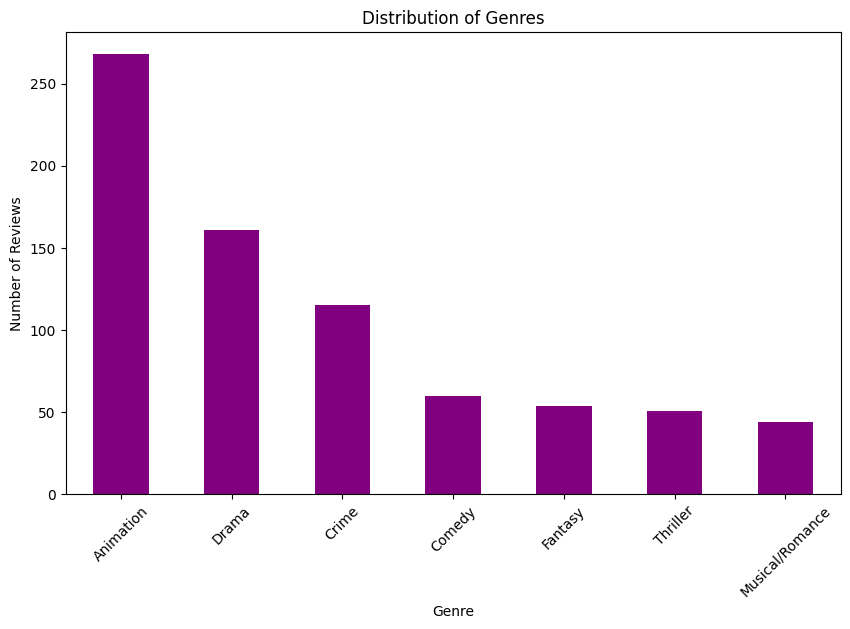

In [16]:
genre_counts = data['genre'].value_counts()

# Plot a bar chart
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='purple')
plt.title("Distribution of Genres")
plt.xlabel("Genre")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45)
plt.show()

In [20]:
pip install bertopic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 2.9 MB/s eta 0:00:00


In [22]:
from bertopic import BERTopic

In [23]:
bertopic_model = BERTopic()
topics, probs = bertopic_model.fit_transform(data['final_review'])

print(bertopic_model.get_topic_info())
bertopic_model.visualize_topics()

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


   Topic  Count                        Name  \
0     -1    341      -1_movie_film_one_like   
1      0    143       0_film_one_movie_like   
2      1     99        1_movie_film_bad_one   
3      2     86        2_movie_show_one_get   
4      3     49      3_film_movie_great_one   
5      4     14     4_movie_zombie_one_film   
6      5     11  5_war_government_made_tape   
7      6     10  6_police_indian_movie_film   

                                      Representation  \
0  [movie, film, one, like, story, would, charact...   
1  [film, one, movie, like, scene, character, get...   
2  [movie, film, bad, one, worst, even, like, see...   
3  [movie, show, one, get, like, funny, comedy, t...   
4  [film, movie, great, one, acting, love, charac...   
5  [movie, zombie, one, film, like, slasher, gore...   
6  [war, government, made, tape, like, movie, wac...   
7  [police, indian, movie, film, mumbai, india, r...   

                                 Representative_Docs  
0  [movie withou

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
